# Simple Neural Network in Python using TensorFlow

In [25]:
# simple neural network in python using tensorflow:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# remove the warnings:
import warnings
warnings.filterwarnings('ignore')

# Load the data set:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
x = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [28]:
x_train.shape[1]

18

In [29]:
# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [32]:
# Train the model:
model.fit(x_train,y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 1.5053 - accuracy: 0.2583
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1.3563 - accuracy: 0.2636
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2350 - accuracy: 0.2794
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1298 - accuracy: 0.2882
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0449 - accuracy: 0.2882
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9681 - accuracy: 0.2865
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9051 - accuracy: 0.3023
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8500 - accuracy: 0.3480
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8023 - accuracy: 0.3814
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7599 - accuracy: 0.4271
Epoch 11/

In [34]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

5/5 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.7762
Test Accuracy: 0.7762237787246704
Test Loss: 0.50278240442276


Test Accuracy: 0.7832167744636536
Test Loss: 0.5086380839347839


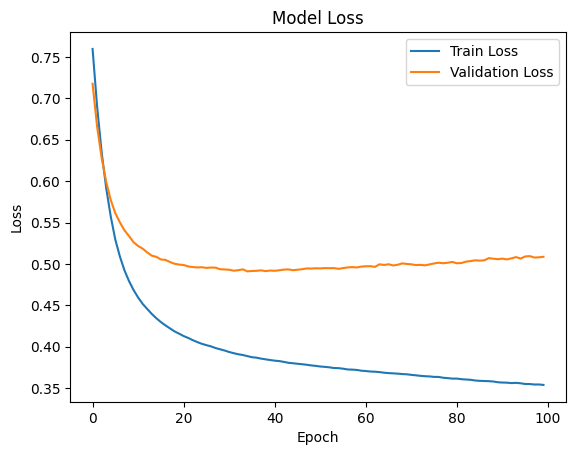

In [36]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model and capture the history:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(x_test, y_test))


# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

# Plotting the training and testing loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()